# Práctica reducción de dimensiones

## Importar

In [1]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import chardet

with open('/home/ef/Documents/Diplomado/data/bank-full - bank-full.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
   
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('/home/ef/Documents/Diplomado/data/bank-full(1).csv',
                 sep = ';',
                engine = 'python')

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34413,33,management,single,tertiary,no,1373,yes,no,cellular,5,may,17,5,349,2,failure,no
28621,39,technician,divorced,secondary,no,1333,yes,yes,cellular,29,jan,585,2,246,1,failure,no
1229,36,technician,married,secondary,no,5611,yes,no,unknown,8,may,39,1,-1,0,unknown,no
35759,48,admin.,married,secondary,no,1131,no,yes,cellular,8,may,49,1,-1,0,unknown,no
12632,41,services,married,secondary,no,6618,yes,no,unknown,4,jul,104,1,-1,0,unknown,no
5298,31,management,married,tertiary,no,5889,yes,no,unknown,23,may,237,1,-1,0,unknown,no
33329,59,management,married,tertiary,no,287,yes,no,cellular,20,apr,818,2,242,8,failure,no
31094,63,retired,married,secondary,no,1612,no,no,telephone,17,feb,233,2,-1,0,unknown,yes
19368,50,self-employed,married,secondary,no,3025,no,yes,cellular,6,aug,168,3,-1,0,unknown,no
32557,52,retired,divorced,primary,no,-779,yes,yes,cellular,17,apr,709,1,-1,0,unknown,yes


In [4]:
## No hay vacíos! (al parecer)
df.isnull().sum() / df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [5]:
dim_antes = df.shape[0]
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
cat = ['job','marital','education','default','housing', 'loan', 'contact', 'month', 'poutcome']
cont = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Limpieza

### Numéricas

In [8]:
## Función para omitir outliers mediante IQR
def outlier(data, x, how):

    var = data[x]
    q1 = var.quantile(.25)
    q3 = var.quantile(.75)
    iqr = q3 - q1
    
    if how == 'max':
        data = data[var <= q3 + 1.5*iqr].copy()
        var = data[x]
        print(var.hist())
    elif how == 'min':
        data = data[var >= q1 - 1.5*iqr].copy()
        var = data[x]
        print(var.hist())
    elif how == 'both':
        data = data[(var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr)].copy()
        var = data[x]
        print(var.hist())
    else:
        print('¿Cómo quieres acotar outliers? how = min/max/both')
    
    data.reset_index(drop = True, inplace = True)
    global df
    df = data.copy()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

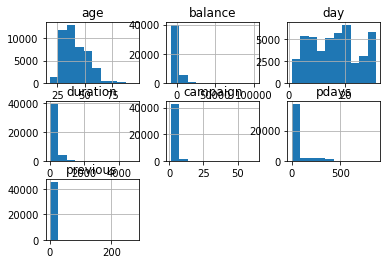

In [9]:
df[cont].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


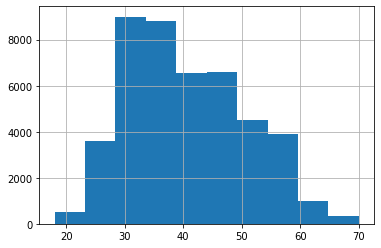

In [10]:
outlier(df, 'age', 'max')

AxesSubplot(0.125,0.125;0.775x0.755)


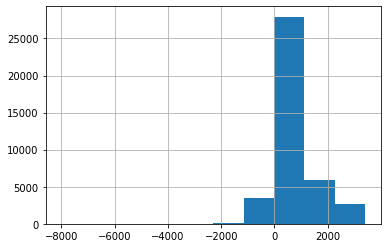

In [11]:
outlier(df, 'balance', 'max')

AxesSubplot(0.125,0.125;0.775x0.755)


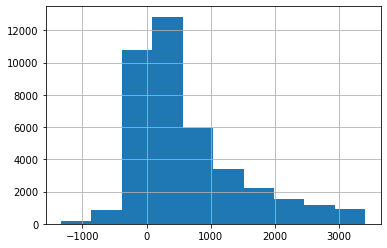

In [12]:
## Al parecer, la variable de balance tiene también outliers negativos
outlier(df, 'balance', 'min')

AxesSubplot(0.125,0.125;0.775x0.755)


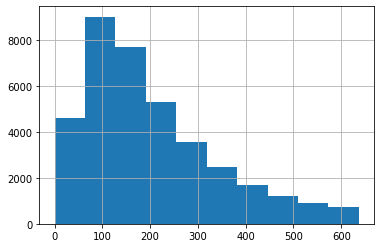

In [13]:
outlier(df, 'duration', 'max')

AxesSubplot(0.125,0.125;0.775x0.755)


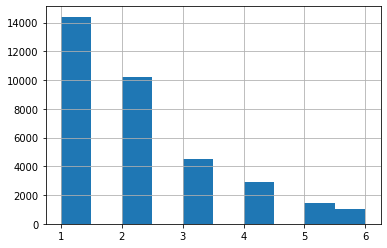

In [14]:
outlier(df, 'campaign', 'max')

AxesSubplot(0.125,0.125;0.775x0.755)


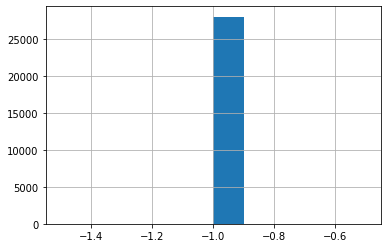

In [15]:
outlier(df, 'pdays', 'max')

AxesSubplot(0.125,0.125;0.775x0.755)


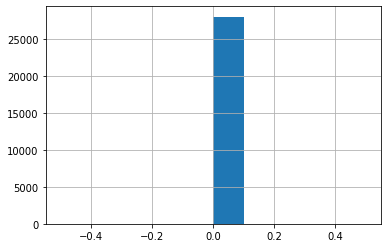

In [16]:
outlier(df, 'previous', 'max')

In [17]:
## No parece que estas columnas aporten al conjunto de datos
df[['pdays', 'previous']].value_counts()

pdays  previous
-1     0           28055
dtype: int64

In [18]:
## Se omiten dentro del conjunto de variables continuas
cont = [x for x in cont if x not in ['pdays', 'previous']]
cont

['age', 'balance', 'day', 'duration', 'campaign']

### Categóricas

In [19]:
## La variable de trabajo tiene bajo % desconocido, cuenta como valor ausente
df['job'].value_counts(1)

blue-collar      0.225735
management       0.198574
technician       0.170237
admin.           0.115915
services         0.097523
retired          0.040492
entrepreneur     0.034290
self-employed    0.033826
unemployed       0.029157
housemaid        0.029121
student          0.018927
unknown          0.006202
Name: job, dtype: float64

In [20]:
## Se omite, no hay riesgo de mucha pérdida de info
df['job'] = df['job'].replace('unknown', np.nan )
df = df[~(df['job'].isnull())].copy()
df.reset_index(drop = True, inplace = True)
df['job'].value_counts(1, dropna = False)

blue-collar      0.227144
management       0.199813
technician       0.171299
admin.           0.116639
services         0.098131
retired          0.040745
entrepreneur     0.034504
self-employed    0.034038
unemployed       0.029339
housemaid        0.029303
student          0.019045
Name: job, dtype: float64

In [21]:
## Mismo caso para la variable de educación
df['education'].value_counts(1, dropna = False)

secondary    0.530110
tertiary     0.277321
primary      0.155769
unknown      0.036799
Name: education, dtype: float64

In [22]:
df['education'] = df['education'].replace('unknown', np.nan )
df = df[~(df['education'].isnull())].copy()
df.reset_index(drop = True, inplace = True)
df['education'].value_counts(1, dropna = False)

secondary    0.550363
tertiary     0.287917
primary      0.161720
Name: education, dtype: float64

In [23]:
## Por otro lado, no es recomendable remover el valor "unknown",
## la falta de información también es información
df['contact'].value_counts(1, dropna = False)

cellular     0.589387
unknown      0.358592
telephone    0.052020
Name: contact, dtype: float64

In [24]:
## Otra variable que no aporta a nuestro conjunto de datos
df['poutcome'].value_counts(1, dropna = False)

unknown    1.0
Name: poutcome, dtype: float64

In [25]:
## Se omite de nuestro conjunto de variables categóricas
cat = [x for x in cat if x not in 'poutcome']
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [26]:
## Después de la limpieza, contamos con casi el 60% de los datos :/
df.shape[0] / dim_antes

0.593992612417332

## Selección de variables

### PCA

In [27]:
## Las variables numéricas se estandarizan

from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #se guarda el método para escalar

X = df[cont].copy()
sc.fit(X) #se calculan los parámetros para estandarizar

X = sc.transform(X) #se aplica la estandarización
X

array([[ 1.81048003,  1.87823902, -1.29174694,  0.40743953, -0.88901197],
       [ 0.38485176, -0.7000158 , -1.29174694, -0.38840689, -0.88901197],
       [-0.73528474, -0.73294526, -1.29174694, -0.93102945, -0.88901197],
       ...,
       [-1.75359065, -0.59756858,  0.14675625,  0.44361436, -0.88901197],
       [-1.54992947, -0.1194816 ,  0.14675625,  1.31181045, -0.1445185 ],
       [ 1.70864944,  0.07931477,  0.14675625,  2.19447648,  1.34446843]])

In [28]:
## Mediante el modelo no supervisado PCA, se busca
## reducir las variables numéricas a sólo 3, la mitad

#from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

Xpca = pd.DataFrame(pca.fit_transform(X))
Xpca.sample(4)

,0,1,2
11918,0.781159,-0.376804,-0.200154
3073,-0.744115,-1.387191,-0.457077
13476,1.329241,-1.058506,0.811945
21443,0.843170,3.391725,0.014435


In [29]:
## Nos explican casi el 61% del todas las variables
pca.explained_variance_ratio_.cumsum()

array([0.2333973 , 0.44959516, 0.64745332])

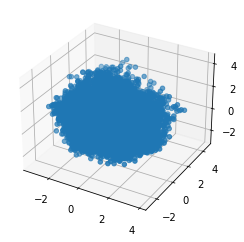

In [30]:
## Comparando en una gráfica 3D
ax = plt.axes(projection = '3d')
ax.scatter3D(Xpca[0],
            Xpca[1],
            Xpca[2])

## No hay tanta dispersión, es bueno (?)

### Kbest

In [31]:
## Otra forma de reducir variables es elegir a las que nos explican
## nuestra variable objetivo:
df['y'].value_counts(1)

no     0.944331
yes    0.055669
Name: y, dtype: float64

In [32]:
from sklearn.feature_selection import SelectKBest

sk = SelectKBest(k = 2) #Queremos las 2 mejores variables que expliquen la var objetivo
sk.fit(X, df['y'])

sk.scores_ #son las 2 con el valor máximo

array([  12.70420346,  118.49771788,   33.45054339, 1726.36078786,
         92.35756512])

In [33]:
best = [a for a,b in list(zip(cont,sk.get_support())) if b] 
best #que son:

['balance', 'duration']

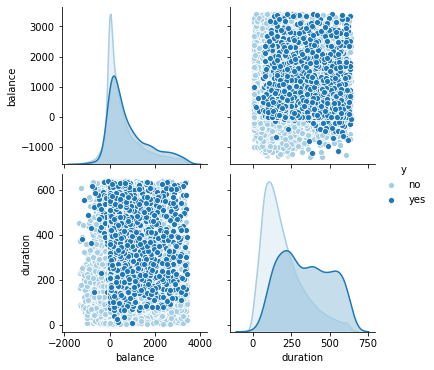

In [34]:
## Así, la variable objetivo tiene un distinto comportamiento claro para estas dos variables:

import seaborn as sns

best = best + ['y']
sns.pairplot(df[best],
            hue = 'y',
            palette = 'Paired')

### Transformación entrópica

Consta de seleccionar las variables categóricas y numéricas-discretizadas (hechas rango) que mejor expliquen el resultado de nuestra variable objetivo

In [35]:
cont

['age', 'balance', 'day', 'duration', 'campaign']

In [36]:
## Se discretizan las variables numéricas, se vuelven rangos (por percentil)
for col in cont:
    df[f'{col}_cut'] = pd.qcut(df[f'{col}'],
                               q = 4,
                              duplicates = 'drop').astype(str)
## Ejemplo
df['balance_cut'].value_counts(1, dropna = False)

(-1336.001, 32.0]    0.250829
(32.0, 315.0]        0.250121
(913.0, 3412.0]      0.249972
(315.0, 913.0]       0.249078
Name: balance_cut, dtype: float64

In [37]:
## Ahora contamos con las variables categóricas, numéricas y las discretizadas
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_cut', 'balance_cut', 'day_cut',
       'duration_cut', 'campaign_cut'],
      dtype='object')

In [38]:
## Se agrupan las variables a evaluar
variables = cat + [col for col in df.columns if col.endswith('_cut')]
variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'age_cut',
 'balance_cut',
 'day_cut',
 'duration_cut',
 'campaign_cut']

In [39]:
## Se construye la función que enlista el IV (Info Value) por columna
def iv(obj, df, var):
    obj = obj #se instancia dentro de la función para que el siguiente bucle la tome en cuenta
    iv_fin = {} #se crea un diccionario vacío
    for x in var:
        aux = df[[x, obj]].copy() #nos interesa evaluar cada variable vs nuestra variable objetivo
        aux['n'] = 1 #columna de apoyo para hacer la suma

        ## Se transforma la estructura de la tabla:
        aux = aux.pivot_table(columns = obj, #teniendo las opciones de nuestra variable objetivo como columnas
                              index = x, #y las categorías (rangos para las numéricas) como renglones
                              values = 'n', #el contador para categoría vs resultado de la variable objetivo
                              aggfunc = 'sum',
                              fill_value = 0).copy() #llenar los vacíos con ceros
        
        aux['no_ev'] = aux['no'] / aux['no'].sum() #divide cada renglón entre el total para obtener la proba de no evento
        aux['si_ev'] = aux['yes'] / aux['yes'].sum() #proba de sí evento
        
        aux['woe'] = np.log(aux['no_ev'] / aux['si_ev']) #se crea la columna de WOE (Weight Of Evidence)
        aux['iv'] = aux['woe']*(aux['no_ev'] - aux['si_ev']) #se crea la columna individual de IV (Info Value)

        iv_fin[x] = aux['iv'].sum().round(3) #y finalmente, suma la columna y la agrega al diccionario

    iv_fin = pd.DataFrame.from_dict(iv_fin,
                                    orient = 'index',
                                    columns = ['IV']).sort_values(by = 'IV',
                                                                  ascending = False)
    
    return iv_fin

In [40]:
## Se aplica la función que evalúa todas las variables de un dataframe
iv(obj = 'y',df = df, var = variables)

,IV
duration_cut,0.866
month,0.792
contact,0.519
housing,0.309
job,0.194
education,0.104
balance_cut,0.102
age_cut,0.089
loan,0.083
marital,0.082


Las 2 variables numéricas más representativas para el resultado de nuestra variable objetivo son duración del contacto y el balance del cliente, mismo resultado con Kbest. La ventaja de este metodología es que despliega el "nivel" de influencia de las variables numéricas y también categóricas. Ahora el banco puede enfocar el presupuesto eficientemente para concretar contratos de crédito.